## Conv Daily data to monthly
Just converts the daily data to monthyl data. should have error bars too.

Should actually copy over the zone datas too

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats



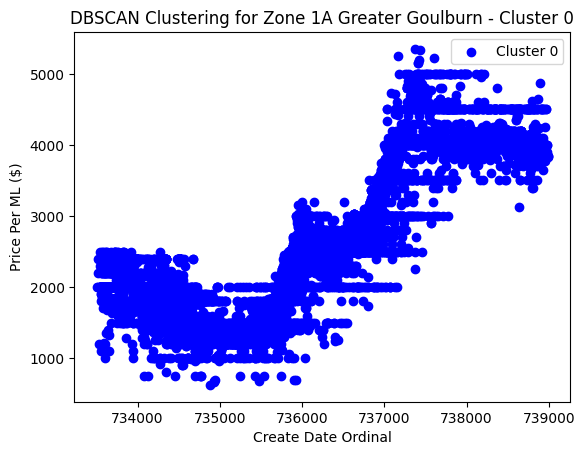

In [6]:
# Get file path
FILE_PATH = "../MACHINE_LEARNING_PART/zone_data_1A_clustered.csv"

# Read the file
df = pd.read_csv(FILE_PATH)

# Filter the DataFrame for entries in Cluster 0
cluster_0_data = df[df['Cluster'] == 0]

# Plot the data for Cluster 0
plt.scatter(cluster_0_data['Create_date_ordinal'], cluster_0_data['Price Per ML ($)'], color='b', label='Cluster 0')
plt.title("DBSCAN Clustering for Zone 1A Greater Goulburn - Cluster 0")
plt.xlabel('Create Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.legend()
plt.show()

            Price Per ML ($)            
                        mean         std
Create_date                             
2009-04-26       2200.000000  200.000000
2009-05-17       2266.666667  230.940108
2009-05-24       2133.333333  206.155281
2009-05-31       2033.333333  225.092574
2009-06-07       2033.333333  400.000000
...                      ...         ...
2024-03-10       3988.571429  141.117985
2024-03-17       4016.666667  242.212028
2024-03-24       4045.000000  263.628527
2024-04-07       3966.666667   57.735027
2024-04-14       3841.660000   14.445304

[770 rows x 2 columns]


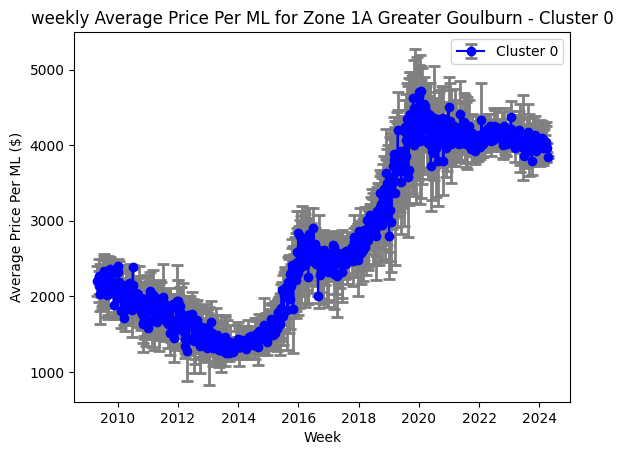

Data saved to zone_data_1A_PRICE_WEEKLY.csv


In [7]:
# Convert 'Create_date' to datetime
df['Create_date'] = pd.to_datetime(df['Create_date'])

df = df.sort_values(by='Create_date')

# Limit the DataFrame to the first 1000 rows after sorting
#df = df.iloc[:1000]

# Filter the DataFrame for entries in Cluster 0
cluster_0_data = df[df['Cluster'] == 0]

# Group by week and calculate mean and standard deviation
weekly_data = cluster_0_data.resample('W', on='Create_date').agg({
    'Price Per ML ($)': ['mean', 'std']
})



# Drop weeks with NaN values if any
weekly_data = weekly_data.dropna()

print(weekly_data)

# Plot the data for Cluster 0 with formal error bars
plt.errorbar(weekly_data.index, weekly_data[('Price Per ML ($)', 'mean')], 
             yerr=weekly_data[('Price Per ML ($)', 'std')], fmt='-o', color='b', label='Cluster 0',
             ecolor='gray', elinewidth=2, capsize=4, capthick=2)

plt.title("weekly Average Price Per ML for Zone 1A Greater Goulburn - Cluster 0")
plt.xlabel('Week')
plt.ylabel('Average Price Per ML ($)')
plt.legend()
plt.show()

# Flatten
weekly_data.columns = ['mean', 'std']

# Reset the index to make 'Create_date' a column and rename it to 'Date'
weekly_data.reset_index(inplace=True)
weekly_data.rename(columns={'Create_date': 'date'}, inplace=True)


# Convert the DataFrame to CSV
output_csv_path = "zone_data_1A_PRICE_WEEKLY.csv"
weekly_data.to_csv(output_csv_path)
print(f"Data saved to {output_csv_path}")
